<a href="https://colab.research.google.com/github/dsaint31x/SS/blob/master/ss07_3_dft_zero_padding_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFT (Discrete Fourier Transform)에서의 zero padding, decimation 등의 효과

* DFT에서 sampling이 미치는 효과에 대한 simulation.
* python을 활용법을 주의깊게 살펴볼 것.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [ ]:
def draw_spectrum(k,Y, marker='o', label='', ax=None):
  if ax == None:
    f, ax = plt.subplots()
  k =  np.fft.fftshift(k)
  Y =  np.fft.fftshift(np.abs(Y))
  ax.plot(k /np.pi ,Y,marker=marker, label=label)
  ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
  ax.grid()

# Original

다음의 `sinc`를 대상으로 DFT (실제로는 FFT)를 수행하고 여기에서 sampling에서의 변화를 줄 예정임.

81


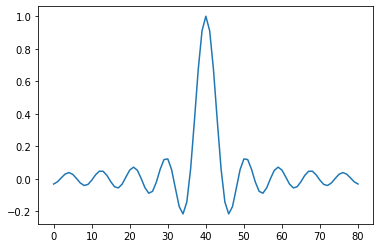

In [ ]:
# original
x = np.linspace(-3*np.pi,3*np.pi,81)
a = np.sinc(x)
plt.plot(a)
print(len(a))

잘 알려져 있듯이 pulse function이 sinc에 대한 DFT로 확인 가능함.

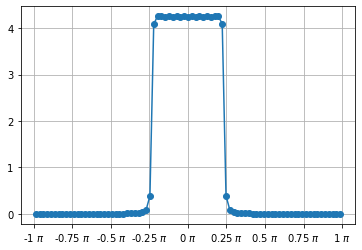

In [ ]:
a_k = np.fft.fft(a)
a_freq = np.fft.fftfreq(len(a))* 2* np.pi

draw_spectrum(a_freq,a_k,marker='o',label='ori')

# Decimation (Under sampling)

factor=3로 decimation을 할 경우,
* 전체 신호의 측정시간($T_\text{duraion}$)이 고정되지만, 해당 측정시간에서 sampling결과로 나오는 sample의 수가 1/3으로 감소하게 됨.
* time domain의 signal $x[n]$의 길이 ($N$)이 81에서 27로 감소함.
* time domain에서의 신호길이의 감소는 frequency domain에서의 $\Delta f = \frac{f_s}{N}(= \frac{2\pi}{N})$의 증가로 이어지고, 
* $\langle 2\pi \rangle$구간에 81개의 값이 존재하던 spectrum이 27로 감소함.

Parseval's theorem에 의해 spectrum의 면적은 같아야하고, 이는 폭이 3배 늘어나는 대신 높이가 1/3으로 줄어들게 된다.

27


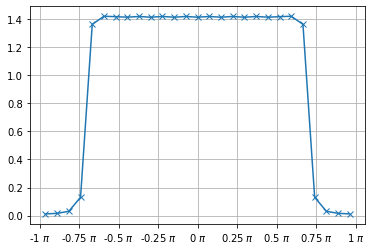

In [ ]:
# decimation
a_decimation =  a[0:-1:3]
a_decimation_freq = np.fft.fftfreq(len(a_decimation))* 2* np.pi
a_decimation_k = np.fft.fft(a_decimation)
print(len(a_decimation))

draw_spectrum(a_decimation_freq,a_decimation_k,marker='x',label='decimation_k')

# Upsampling
factor=3로 upsampling을 할 경우,

* 전체 신호의 측정시간( $T_\text{duraion}$ )이 고정되지만, 해당 측정시간에서 sampling결과로 나오는 sample의 수가 3배 증가하게 되며, sampling ratio $f_s$가 3배 커지게 됨.
* time domain의 signal  x[n] 의 길이 ( N )이 81에서 247로 증가함.
* 이는 frequency domain에서의  $\Delta f=\frac{3\times f_s}{3\times N}$으로 이어지며, frequency resolution는 변화없음을 의미.
* 하지만, $\langle 2\pi \rangle$ 구간에 매핑되는 $f_s$는 3배 커진 셈이므로 original의 경우 보다 1/3 로 줄어든 폭(width)의 spectrum이 나오게 됨.

Parseval's theorem에 의해 spectrum의 면적은 같아야하고, 이는 폭이 1/3로 줄어든 대신 높이가 3배 커짐.

243


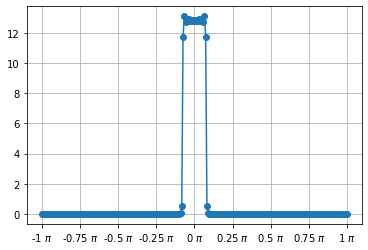

In [ ]:
x_up = np.linspace(-3*np.pi,3*np.pi,81*3)
a_up = np.sinc(x_up)
a_up_k = np.fft.fft(a_up)
a_up_freq = np.fft.fftfreq(len(a_up))* 2* np.pi
print(len(a_up_k))
draw_spectrum(a_up_freq,a_up_k,marker='o',label='ori')

# 신호 측정 시간을 늘림.

* 이 경우, sampling frequency가 변화 없으므로 spectrum의 대역폭은 같으나, 
* 실제로 측정한 sampling이 3배 늘어나기 때문에 늘어난 만큼의 freqeuncy resolution의 향상이 있음.
* 즉, 같은 대역폭에 대한 spectrum이나 보다 정확한 spectrum이 얻어짐.

243


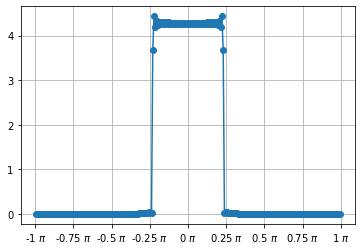

In [ ]:
x_enlong = np.linspace(-9*np.pi,9*np.pi,81*3)
a_enlong = np.sinc(x_enlong)
a_enlong_k = np.fft.fft(a_enlong)
a_enlong_freq = np.fft.fftfreq(len(a_enlong))* 2* np.pi
print(len(a_enlong_k))
draw_spectrum(a_enlong_freq,a_enlong_k,marker='o',label='ori')

# Zero interpolation
decimation과 달리 intepolation을 하는데, 실제 계산에 의한 interpolation이 아닌 zero intepolation을 수행할 경우,
* zero interpoation의 경우, 기존에는 동일 간격에 대해 3개 sample이 존재[(a)왼쪽] 했다면, 아래 그림[(b) 왼쪽]에서 보이듯이 9개로 늘어나게 되며, 이는 sampling rate가 3배 증가 (= sampling interval $\Delta t \to \frac{1}{3}\Delta t$로 감소)함을 의미.
  * $\Delta n=1$이었는데, $\Delta n=3$으로 3배 커지며, 이는 sampling rate가 늘어나게 됨.
  * $x_\text{new}[n]=x[\frac{1}{3} n]$ 에 해당하고, 3의 배수가 아닌 경우는 0으로 채워짐.
* 이 경우는 samplint rate가 3배 증가($f_s \to 3f_s$)하여 기존의 3배의 frequency가 $2\pi$에 해당하게 됨 
* 동시에, $\langle 2\pi \rangle$구간의 spectrum의 sample 갯수가 81에서 243으로 역시 3배 증가하면서 spectrum의 간격은 zero interpolation하기 전의 실제 주파수 간격($\Delta f=\frac{3\times f_s}{3\times N}$)을 그대로 유지하게 됨. 
* 문제는 zero-interpolation하기 전의 signal이 이전 sampling rate인 $f_s$로 반복되므로 기존에 $\langle 2\pi \rangle$구간에 한번 존재했던 spectrum이 3배 커진 주파수 대역을 $\langle 2\pi \rangle$구간이 표현하게 되면서 3번 반복되게 됨.

요약하면,
* sampling rate증가에 따른 $\langle 2\pi \rangle$구간이 표현하는 실제 주파수 대역이 커짐.
* 기존의 spectrum의 샘플 unit interval에 해당하는 주파수는 그대로 (이는 측정시간에 반비례하는데 전체 측정 시간은 그대로이므로)임.
* 즉, $\langle 2\pi \rangle$가 다루는 실제 주파수 대역이 늘어났지만, zero interpolation 전의 신호의 스펙트럼이 반복되는 주파수 주기는 그대로이므로 3번의 반복이 보이게 되는 것임.


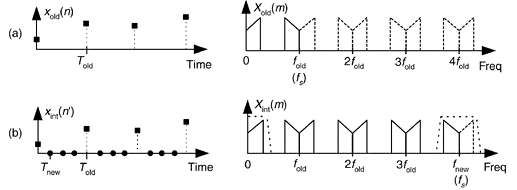

243


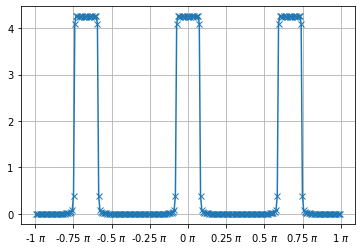

In [ ]:
# zero interpolation
z_inter = np.zeros(a.shape[0]*3, dtype=a.dtype)
z_inter [0:-1:3]=a
z_inter_freq = np.fft.fftfreq(len(z_inter))* 2* np.pi
z_inter_k = np.fft.fft(z_inter)
print(len(z_inter_k))

draw_spectrum(z_inter_freq,z_inter_k,marker='x',label='z_int')

# Zero padding
zero intepolation과 달리, time domain에서의 샘플간의 간격($\Delta t$)는 변화시키지 않고,샘플링 수를 늘리는 것으로 이는 time domain의 signal의 전체 길이($T_\text{duraion}$)가 3배 커지게 됨.
* $\Delta t$가 변화가 없으므로 sampling rate $f_s$는 그대로임.
* 즉, $\langle 2\pi \rangle$구간에 매핑되는 주파수 영역은 같음.
* 하지만, $\Delta t$가 그대로이면서 signal의 전체 길이($T_\text{duraion}$)가 3배 증가하므로, 샘플의 수는 3배 증가하게 되고 frequency resolution을 결정하는 $\Delta f=\frac{f_s}{N}$는 1/3로 작아지게 됨. ($f_s$는 그대로이나 $N$이 3배 증가!)

결국, orignal과 같은 폭과 모양의 spectrum이 $\langle 2\pi \rangle$구간에 보이나 샘플링이 3배 촘촘하게 이루어지게됨.

243


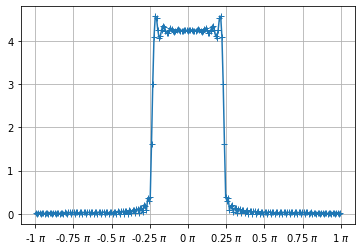

In [ ]:
# zero padding
z_pad = np.zeros(a.shape[0]*3, dtype=a.dtype)
z_pad [0:len(a)]=a
z_pad_freq = np.fft.fftfreq(len(z_pad))* 2* np.pi
z_pad_k = np.fft.fft(z_pad)
print(len(z_pad))

draw_spectrum(z_pad_freq,z_pad_k,marker='+',label='z_pad')

# Comparison

Original과 비교하여
* upsampling : $f_s$가 증가하므로 고정된 $\langle 2\pi \rangle$에서의 spectrum은 폭이 줄고 대신 높이는 커지는 형태를 보임 (time signal에서 실제 값을 가지는 sample간의 간격도 $f_s$의 증가폭에 비례하여 감소됨).
* decimation : $f_s$가 감소한 경우로, 고정된 $\langle 2\pi \rangle$에서의 spectrum은 폭이 커지고 대신 높이는 작아지는 형태를 보임.(time signal에서 실제 값을 가지는 sample간의 간격도 $f_s$의 감소폭에 비례하여 증가됨).

Original과 비교하여
* zero interpolation : upsampling의 경우처럼, $f_s$가 증가하지만, 실제 값이 존재하는 time domain signal의 "시간 상 간격"이 그대로(zero로 채워졌을 뿐 실제 값사이의 time interval은 그대로임)이기 때문 해당 signal에 해당하는 ***spectrum의 반복주기는 그대로***임. 즉, spectrum의 반복주기는 그대로인데, ***$\langle 2\pi \rangle$에 매핑되는 대역폭은 증가***하므로 aliasing이 발생하면서  $\langle 2\pi \rangle$에서 3개의 주기의 spectrum이 보이게 됨.
* zero padding : $\Delta t$는 그대로인데, $T_\text{duraion}$이 3배 커지므로, ***$\langle 2\pi \rangle$에 매핑되는 대역폭은 그대로***이지만, ***$\Delta f$가 1/3로 작아지게 됨***. 


81 243 243


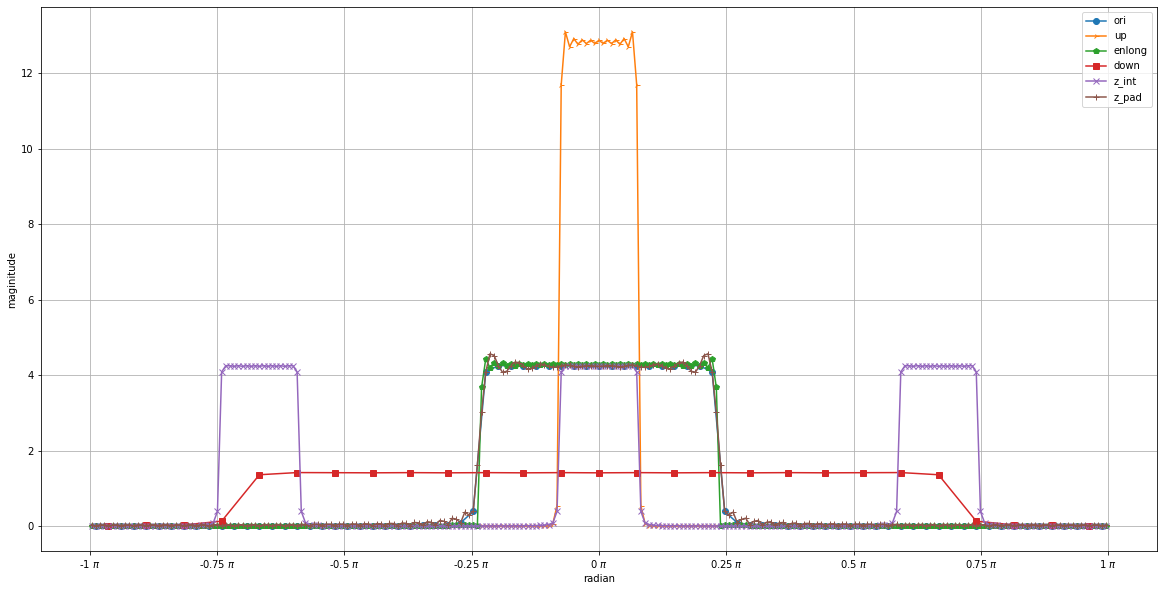

In [ ]:
f,ax=plt.subplots(figsize=(20,10))
draw_spectrum(a_freq,a_k,marker='o',label='ori', ax=ax)
draw_spectrum(a_up_freq,a_up_k,marker='4',label='up', ax=ax)
draw_spectrum(a_enlong_freq,a_enlong_k,marker='p',label='enlong', ax=ax)
draw_spectrum(a_decimation_freq,a_decimation_k,marker='s',label='down', ax=ax)
draw_spectrum(z_inter_freq,z_inter_k,marker='x',label='z_int', ax=ax)
draw_spectrum(z_pad_freq,z_pad_k,marker='+',label='z_pad', ax=ax)
ax.grid('on')
ax.legend()
ax.set_xlabel('radian')
ax.set_ylabel('maginitude')
print(len(a_k), len(z_inter_k), len(z_pad_k))

# Note
* 이 문서에서는 의도적으로 `numpy`만을 활용하여 수행함.
* `scipy`의 `signal` 라이브러리가 보다 많은 기능을 제공하고 세부적인 조정이 가능함.
* 기본적으로 api는 매우 유사하므로 간단한 경우는 `numpy`로도 해결이 가능함.
* 단, 학습을 위해서 `scipy.signal`을 이용하여 위의 예제들을 다시 수행해보길 권함.